## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Store who filepath in a variable
who = "Covid_WHO_Jan_Feb.csv"

In [3]:
# Bring in twitter data from CSV
who_df = pd.read_csv(who, encoding="ISO-8859-1")

# Show just the header
who_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [4]:
#Create total case numbers
group_who_df = who_df.groupby(["ObservationDate"])
cases = group_who_df["Confirmed"].sum()

In [5]:
#Create total case dataframe
who_analysis = pd.DataFrame({
    "Covid Cases" : cases})

who_analysis.head()

,Covid Cases
ObservationDate,
1/22/2020,557
1/23/2020,1097
1/24/2020,941
1/25/2020,1437
1/26/2020,2118


In [6]:
#Create total death numbers and dataframe
deaths = group_who_df["Deaths"].sum()

death_analysis = pd.DataFrame({
    "Covid Deaths" : deaths})

death_analysis.head()

,Covid Deaths
ObservationDate,
1/22/2020,17
1/23/2020,34
1/24/2020,26
1/25/2020,42
1/26/2020,56


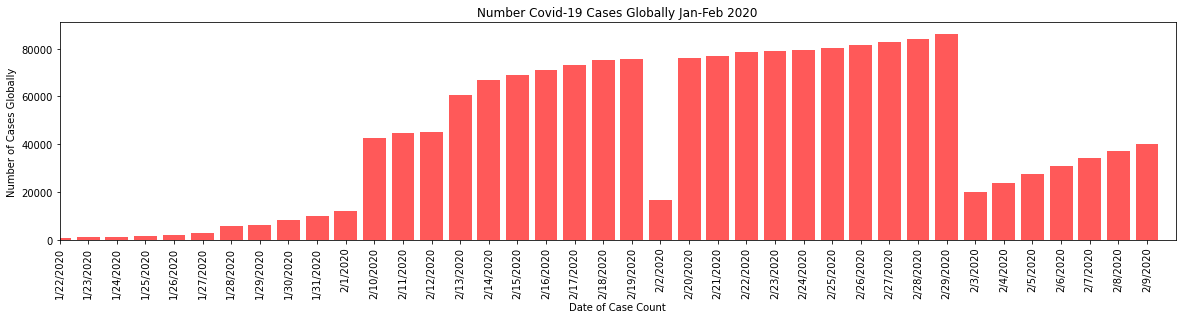

<Figure size 432x288 with 0 Axes>

In [7]:
#Bar Chart showing progression of virus
plt.figure(figsize=(20,4))
plt.bar(who_analysis.index.values, who_analysis["Covid Cases"],color='r', alpha=0.65, align="center" )
plt.xticks(rotation=90)

#Label Bar Chart
plt.title("Number Covid-19 Cases Globally Jan-Feb 2020")
plt.xlabel("Date of Case Count")
plt.ylabel("Number of Cases Globally")

plt.xlim(0, len(who_analysis))
plt.ylim(0, max(who_analysis["Covid Cases"])+5000)
plt.savefig("Covid_Case.png")
plt.show()
plt.tight_layout()

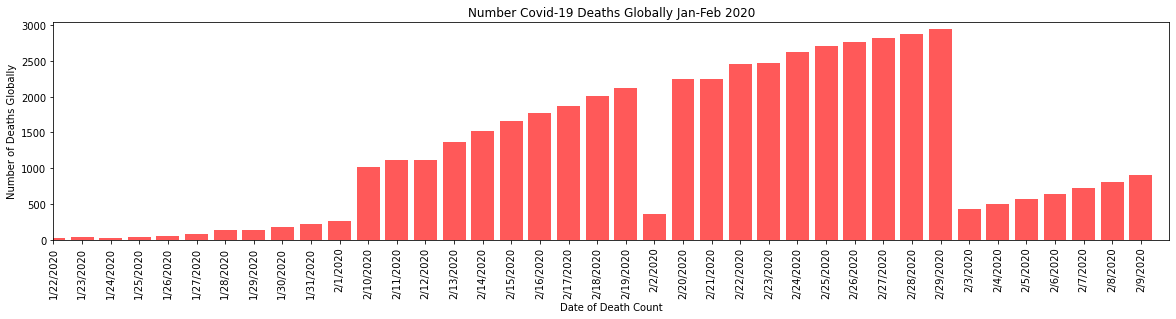

<Figure size 432x288 with 0 Axes>

In [8]:
#Bar Chart showing progression of virus
plt.figure(figsize=(20,4))
plt.bar(death_analysis.index.values, death_analysis["Covid Deaths"],color='r', alpha=0.65, align="center" )
plt.xticks(rotation=90)

#Label Bar Chart
plt.title("Number Covid-19 Deaths Globally Jan-Feb 2020")
plt.xlabel("Date of Death Count")
plt.ylabel("Number of Deaths Globally")

plt.xlim(0, len(death_analysis))
plt.ylim(0, max(death_analysis["Covid Deaths"])+100)
plt.savefig("Covid_Death.png")
plt.show()
plt.tight_layout()

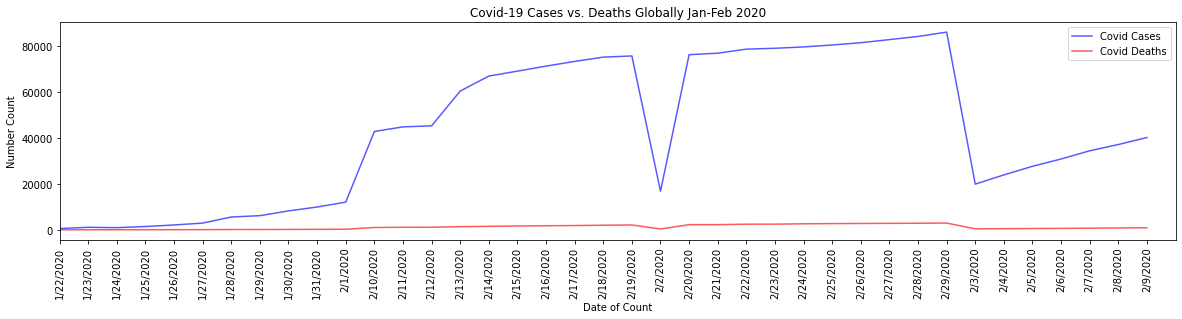

<Figure size 1440x288 with 0 Axes>

In [9]:
#Create a line chart that tracks both covid cases and covid deaths
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.xlim(0, len(who_analysis))

x_axis = who_analysis.index.values
points = who_analysis["Covid Cases"]
CovidCases, = plt.plot(x_axis, points, color="blue", alpha=0.65,label="Covid Cases")

x2 = death_analysis.index.values
points2 = death_analysis["Covid Deaths"]
CovidDeaths, = plt.plot(x2, points2, color="red", alpha=0.65,label="Covid Deaths")

plt.title("Covid-19 Cases vs. Deaths Globally Jan-Feb 2020")
plt.xlabel("Date of Count")
plt.ylabel("Number Count")

plt.legend(handles=[CovidCases, CovidDeaths], loc="best")

plt.figure(figsize=(20,4))
plt.savefig("CovidCase_vs_Death.png")
plt.show()